# Load images to be used for training

Number of car images in labeled data set: 8792
Number of not car images in labeled data set: 8968


Text(0.5, 1.0, 'not car')

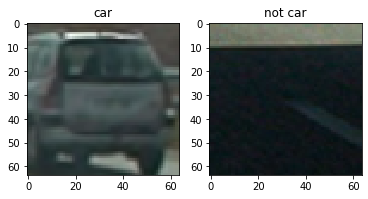

In [21]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def get_images_in_dir(dir):
    l = []
    for path, subdirs, files in os.walk(dir):
        for name in files:
            if name.endswith('.png'):
                l.append(os.path.join(path, name))                
    return l
                
car_list = get_images_in_dir("labeled_images/vehicles")
not_car_list = get_images_in_dir("labeled_images/non_vehicles")

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

data_dict = data_look(car_list, not_car_list)
print("Number of car images in labeled data set: " + str(data_dict["n_cars"]))
print("Number of not car images in labeled data set: " + str(data_dict["n_notcars"]))

# plot two example images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mpimg.imread(car_list[0]))
axarr[0].set_title('car')
axarr[1].imshow(mpimg.imread(not_car_list[0]))
axarr[1].set_title('not car')


# Extract HOG feature vectors from images

(7, 2, 2, 9)
(252,)
[3.67185290e-02 1.14593413e-02 6.88489664e-02 3.06694904e-01
 3.06694904e-01 5.63332721e-02 1.81671911e-02 0.00000000e+00
 0.00000000e+00 1.48475684e-01 8.68016081e-02 7.80419737e-02
 2.64118905e-01 3.06694904e-01 3.06694904e-01 1.34946875e-01
 2.67166235e-01 1.03002687e-01 2.79891335e-02 1.43136700e-02
 2.32934374e-01 1.82016667e-01 3.06694904e-01 4.72217785e-02
 5.85579926e-02 4.81693853e-02 5.81051144e-02 3.06694904e-01
 1.77017817e-01 1.71800023e-01 1.87244374e-01 3.95350290e-02
 7.68686524e-02 9.16141455e-02 7.38746425e-02 5.75643497e-02
 9.39871435e-02 5.49466079e-02 4.94016393e-02 1.67190888e-01
 3.75019184e-01 2.29735595e-01 8.54232216e-02 1.69119889e-01
 6.52021132e-02 8.20427908e-02 4.12836197e-02 1.04521560e-02
 3.25083282e-01 5.28515186e-01 1.91038282e-01 9.19527256e-02
 1.39758442e-02 0.00000000e+00 4.05899193e-01 1.12054705e-01
 1.08751770e-01 1.18528256e-01 2.50262154e-02 4.86589108e-02
 5.79930101e-02 4.67636615e-02 3.64390225e-02 2.66068339e-03
 2.3

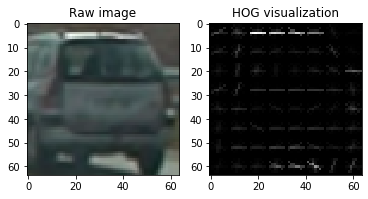

In [22]:
# import cv2
from skimage.feature import hog
import numpy as np
pix_per_cell = 8
cell_per_block = 2
orient = 9

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=True,
                     feature_vec=True):
                         
    """
    Function accepts params and returns HOG features (optionally flattened) and an optional matrix for 
    visualization. Features will always be the first return (flattened if feature_vector= True).
    A visualization matrix will be the second return if visualize = True.
    """
    
    return_list = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys', transform_sqrt=False, 
                                  visualize= vis, feature_vector= feature_vec)
    
    # name returns explicitly
    hog_features = return_list[0]
    if vis:
        hog_image = return_list[1]
        return hog_features, hog_image
    else:
        return hog_features
    
image = mpimg.imread(car_list[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

features, hog_image = get_hog_features(gray, orient, pix_per_cell, cell_per_block)

# plot example images with extracted HOG visualization
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[0].set_title('Raw image')
axarr[1].imshow(hog_image, cmap='gray')
axarr[1].set_title('HOG visualization')



In [23]:
def get_features_from_list(image_path_list):
    feature_list = []
    for image_path in image_path_list:
        image = mpimg.imread(car_list[0])
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        feature_vec = get_hog_features(gray, orient, pix_per_cell, cell_per_block, False, False)
        feature_list.append(np.ravel(feature_vec))
    return feature_list
    
car_features = get_features_from_list(car_list)
print(len(car_features))
print(car_features[0].shape)
not_car_features = get_features_from_list(not_car_list)
print(len(not_car_features))
print((not_car_features[0].shape))

# Define a labels vector based on features lists
y = np.hstack((np.ones(len(car_features)), 
              np.zeros(len(not_car_features))))

# Create an array stack of feature vectors
X = np.vstack((car_features, not_car_features)).astype(np.float64)
        



8792
(252,)
8968
(252,)


# Train a SVM classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

# Fit a per-column scaler only on the training data
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to both X_train and X_test
scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
#t=time.time()
svc.fit(X_train, y_train)
#t2 = time.time()
#print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
#t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
#t2 = time.time()
#print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.4963
My SVC predicts:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
For these 10 labels:  [1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
